# CREDIT CARD FRAUD DETECTION
The aim of this task is to detect fraudulent credit card transactions

## Importing necessary libraries

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score,roc_auc_score, roc_curve, auc, precision_recall_curve
import pickle
from hmmlearn import hmm
from sklearn.utils import resample
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

## Loading, describing and filtering data

In [2]:
credit_card = pd.read_csv(r"C:\Users\HP\Downloads\fraudTest.csv\fraudTest.csv") # loading the dataset into jupyter

credit_card.head() # display top 5 rows

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,21/06/2020 12:14,2.291160e+15,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497.0,Mechanical engineer,19/03/1968,2da90c7d74bd46a0caf3777415b3ebd3,1.371817e+09,33.986391,-81.200714,0.0
1,1,21/06/2020 12:14,3.573030e+15,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302.0,"Sales professional, IT",17/01/1990,324cc204407e99f51b0d6ca0055005e7,1.371817e+09,39.450498,-109.960431,0.0
2,2,21/06/2020 12:14,3.598220e+15,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496.0,"Librarian, public",21/10/1970,c81755dbbbea9d5c77f094348a7579be,1.371817e+09,40.495810,-74.196111,0.0
3,3,21/06/2020 12:15,3.591920e+15,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767.0,Set designer,25/07/1987,2159175b9efe66dc301f149d3d5abf8c,1.371817e+09,28.812398,-80.883061,0.0
4,4,21/06/2020 12:15,3.526830e+15,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126.0,Furniture designer,06/07/1955,57ff021bd3f328f8738bb535c302a31b,1.371817e+09,44.959148,-85.884734,0.0


In [3]:
credit_card.info() # summary of dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506447 entries, 0 to 506446
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             506447 non-null  int64  
 1   trans_date_trans_time  506447 non-null  object 
 2   cc_num                 506447 non-null  float64
 3   merchant               506447 non-null  object 
 4   category               506446 non-null  object 
 5   amt                    506446 non-null  float64
 6   first                  506446 non-null  object 
 7   last                   506446 non-null  object 
 8   gender                 506446 non-null  object 
 9   street                 506446 non-null  object 
 10  city                   506446 non-null  object 
 11  state                  506446 non-null  object 
 12  zip                    506446 non-null  float64
 13  lat                    506446 non-null  float64
 14  long                   506446 non-nu

In [4]:
credit_card[credit_card.is_fraud==1].describe() # statistical summary of frauded customers

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,2133.000000,2.133000e+03,2133.000000,2133.000000,2133.000000,2133.000000,2.133000e+03,2.133000e+03,2133.000000,2133.000000,2133.0
mean,240525.704173,3.875798e+17,527.855546,47885.403188,39.025464,-90.416414,6.483029e+04,1.379541e+09,39.024257,-90.434975,1.0
std,134283.176789,1.279576e+18,392.702281,26771.136135,5.071070,14.162298,2.197862e+05,4.518350e+06,5.086567,14.173298,0.0
min,1685.000000,6.048700e+10,1.780000,1257.000000,20.082700,-155.488000,2.300000e+01,1.371852e+09,19.161782,-156.480766,1.0
25%,131478.000000,3.056060e+13,214.510000,23850.000000,35.065900,-96.743000,1.131000e+03,1.375752e+09,35.057497,-96.697100,1.0
50%,244011.000000,2.358120e+15,371.840000,48034.000000,39.963600,-87.828600,2.870000e+03,1.379462e+09,39.750323,-87.973260,1.0
75%,343708.000000,4.335530e+15,906.850000,68031.000000,42.180800,-79.785600,1.125600e+04,1.383271e+09,42.208725,-79.825939,1.0
max,506021.000000,4.989850e+18,1320.920000,99921.000000,55.473200,-67.950300,1.577385e+06,1.387597e+09,56.214113,-66.960745,1.0


In [5]:
credit_card[credit_card.is_fraud==0].describe() # statistical summary of other customers

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,504313.000000,5.043130e+05,504313.000000,504313.000000,504313.000000,504313.000000,5.043130e+05,5.043130e+05,504313.000000,504313.000000,504313.0
mean,253276.201304,4.179369e+17,67.619999,48846.511535,38.539336,-90.229925,8.844360e+04,1.379963e+09,38.538998,-90.229694,0.0
std,146244.627346,1.309921e+18,146.047020,26856.981947,5.061734,13.718529,3.011074e+05,4.886527e+06,5.096092,13.730241,0.0
min,0.000000,6.041621e+10,1.000000,1257.000000,20.027100,-165.672300,2.300000e+01,1.371817e+09,19.027422,-166.671575,0.0
25%,126592.000000,1.800430e+14,9.600000,26292.000000,34.668900,-96.809400,7.410000e+02,1.375599e+09,34.752155,-96.907147,0.0
50%,253236.000000,3.521420e+15,47.200000,48174.000000,39.371600,-87.476900,2.408000e+03,1.379798e+09,39.373874,-87.443726,0.0
75%,379976.000000,4.642260e+15,82.680000,72042.000000,41.894800,-80.175200,1.968500e+04,1.384616e+09,41.952995,-80.264701,0.0
max,506445.000000,4.992350e+18,19364.910000,99783.000000,65.689900,-67.950300,2.906700e+06,1.387604e+09,66.679297,-66.952026,0.0


In [6]:
credit_card.describe(include="object") # summary of categorical data

,trans_date_trans_time,merchant,category,first,last,gender,street,city,state,job,dob,trans_num
count,506447,506447,506446,506446,506446,506446,506446,506446,506446,506446,506446,506446
unique,212579,694,14,341,471,2,924,849,50,478,910,506446
top,01/12/2020 19:01,fraud_Kilback LLC,gas_transport,Christopher,Smith,F,6983 Carrillo Isle,Birmingham,TX,Film/video editor,23/03/1977,2da90c7d74bd46a0caf3777415b3ebd3
freq,16,1702,51539,10466,11028,277887,1351,2190,36823,3764,2195,1


In [7]:
# number of frauded and other customers
frauded_customers = credit_card[credit_card.is_fraud == 1].shape[0]
other_customers = credit_card[credit_card.is_fraud == 0].shape[0]

# percentage of frauded customers
percent_frauded = frauded_customers/(frauded_customers+other_customers)*100
print(f"{percent_frauded:.2f}% percent of the frauded customers")

# percentage of other customers
percent_other = other_customers/(frauded_customers+other_customers)*100
print(f"{percent_other:.2f}% percent of the other customers")

0.42% percent of the frauded customers
99.58% percent of the other customers


In [8]:
credit_card.columns # displays all columns in dataframe

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

In [9]:
# using the date of birth column to calculate the customers age which might be a key feature for prediction
credit_card['dob'] = pd.to_datetime(credit_card['dob'], format='%d/%m/%Y', errors='coerce')
def calculate_age(dob):
    today = pd.Timestamp.now()
    if pd.isnull(dob):
        return None
    age = today.year - dob.year
    if (today.month, today.day) < (dob.month, dob.day):
        age -= 1
    return age
# creates a new column in dataframe which contains customers age
credit_card['age'] = credit_card['dob'].apply(calculate_age)

In [10]:
# filters unwanted columns 
credit_card = credit_card[["category","amt","gender","city","state","lat","long","job","is_fraud","age"]]
credit_card.head()

,category,amt,gender,city,state,lat,long,job,is_fraud,age
0,personal_care,2.86,M,Columbia,SC,33.9659,-80.9355,Mechanical engineer,0.0,56.0
1,personal_care,29.84,F,Altonah,UT,40.3207,-110.4360,"Sales professional, IT",0.0,34.0
2,health_fitness,41.28,F,Bellmore,NY,40.6729,-73.5365,"Librarian, public",0.0,53.0
3,misc_pos,60.05,M,Titusville,FL,28.5697,-80.8191,Set designer,0.0,37.0
4,travel,3.19,M,Falmouth,MI,44.2529,-85.0170,Furniture designer,0.0,69.0


<Axes: xlabel='gender', ylabel='count'>

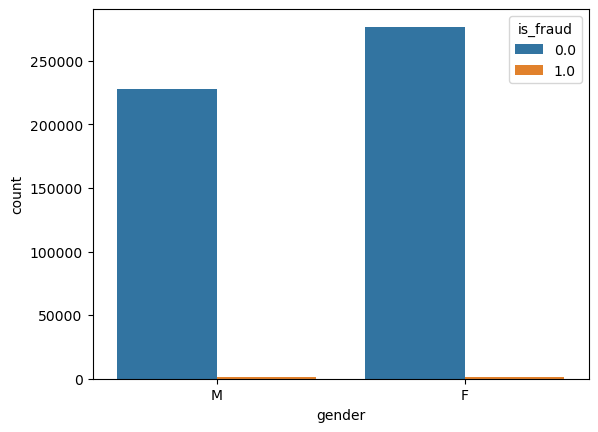

In [11]:
sns.countplot(data=credit_card,x="gender",hue="is_fraud") # plots a bar chart for gender splitting the bars by fraud status

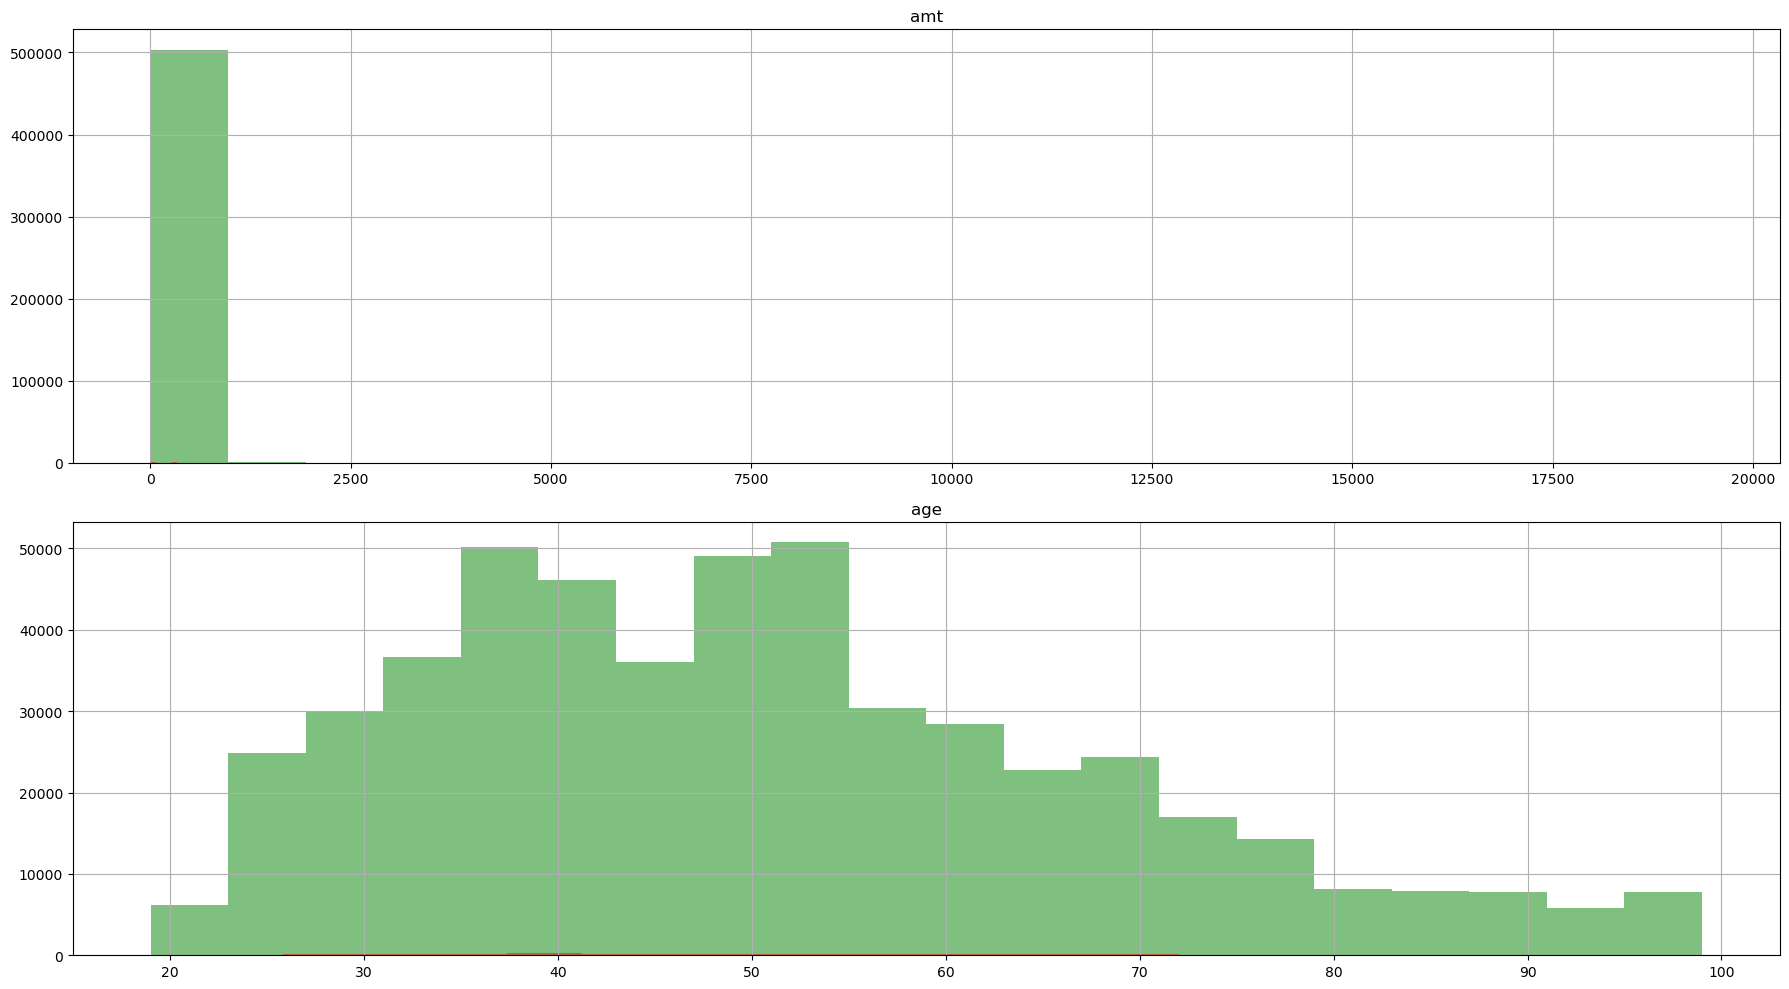

In [12]:
# assigns numerical data to a variable
num_feats = ["amt","age"]
# Creates a figure with multiple subplots
fig, ax = plt.subplots(2, 1, figsize=(18,10))

# Flattens the ax array for easy indexing
ax = ax.flatten()

# plots histogram for is_fraud == 0
credit_card[credit_card.is_fraud == 0][num_feats].hist(bins=20, color="green", alpha=0.5, ax=ax[:len(num_feats)])

# plots histogram for is_fraud ==1
credit_card[credit_card.is_fraud == 1][num_feats].hist(bins=20, color="red", alpha=0.5, ax=ax[:len(num_feats)])

plt.tight_layout()
plt.show()

## Data preprocessing

In [13]:
# Filters the DataFrame to get only the rows where 'is_fraud' is 0 (Legit transactions)
Legit = credit_card[credit_card.is_fraud == 0]

# Filters the DataFrame to get only the rows where 'is_fraud' is 1 (Fraudulent transactions)
Fraud = credit_card[credit_card.is_fraud == 1]

# Print the shapes of the two DataFrames
print(Legit.shape, Fraud.shape)


(504313, 10) (2133, 10)


In [14]:
# Upsamples the minority class (fraudulent transactions) to have 100,000 samples
minority_data_upsampling = resample(Fraud, n_samples=100000, random_state=1)    

# Creates a new dataset by concatenating a subset of the legit transactions with the upsampled minority class 
# by taking the first 100,000 rows from the 'Legit' DataFrame to balance with the upsampled 'Fraud' DataFrame
new_dataset = pd.concat([Legit[:100000], minority_data_upsampling])

# The new dataset is now balanced with 100,000 legit transactions and 100,000 fraudulent transactions

In [15]:
new_dataset.head() # displyas top 5 rows of new dataset

,category,amt,gender,city,state,lat,long,job,is_fraud,age
0,personal_care,2.86,M,Columbia,SC,33.9659,-80.9355,Mechanical engineer,0.0,56.0
1,personal_care,29.84,F,Altonah,UT,40.3207,-110.4360,"Sales professional, IT",0.0,34.0
2,health_fitness,41.28,F,Bellmore,NY,40.6729,-73.5365,"Librarian, public",0.0,53.0
3,misc_pos,60.05,M,Titusville,FL,28.5697,-80.8191,Set designer,0.0,37.0
4,travel,3.19,M,Falmouth,MI,44.2529,-85.0170,Furniture designer,0.0,69.0


In [16]:
new_dataset[["amt","age"]].describe()

,amt,age
count,200000.000000,200000.000000
mean,297.556548,51.261615
std,375.375702,17.575234
min,1.000000,19.000000
25%,20.670000,38.000000
50%,88.160000,49.000000
75%,464.990000,63.000000
max,13149.150000,99.000000


In [17]:
# Counts the number of frauded customers in the new dataset
frauded_customers = new_dataset[new_dataset.is_fraud == 1].shape[0]

# Counts the number of non-frauded (other) customers in the new dataset
other_customers = new_dataset[new_dataset.is_fraud == 0].shape[0]

# Calculates the total number of customers
total_customers = frauded_customers + other_customers

# Calculates and prints the percentage of frauded customers
print(frauded_customers / total_customers * 100, "percent of the frauded customers")

# Calculates and prints the percentage of other (non-frauded) customers
print(other_customers / total_customers * 100, "percent of the other customers")

50.0 percent of the frauded customers
50.0 percent of the other customers


<Axes: xlabel='gender', ylabel='count'>

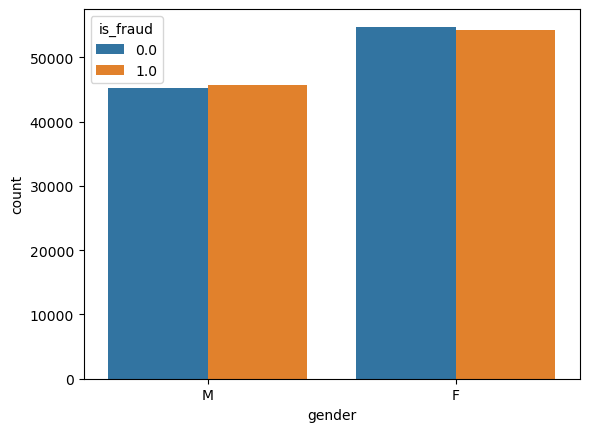

In [18]:
sns.countplot(data=new_dataset,x="gender",hue="is_fraud") # plots a bar chart for gender splitting the bars by fraud status

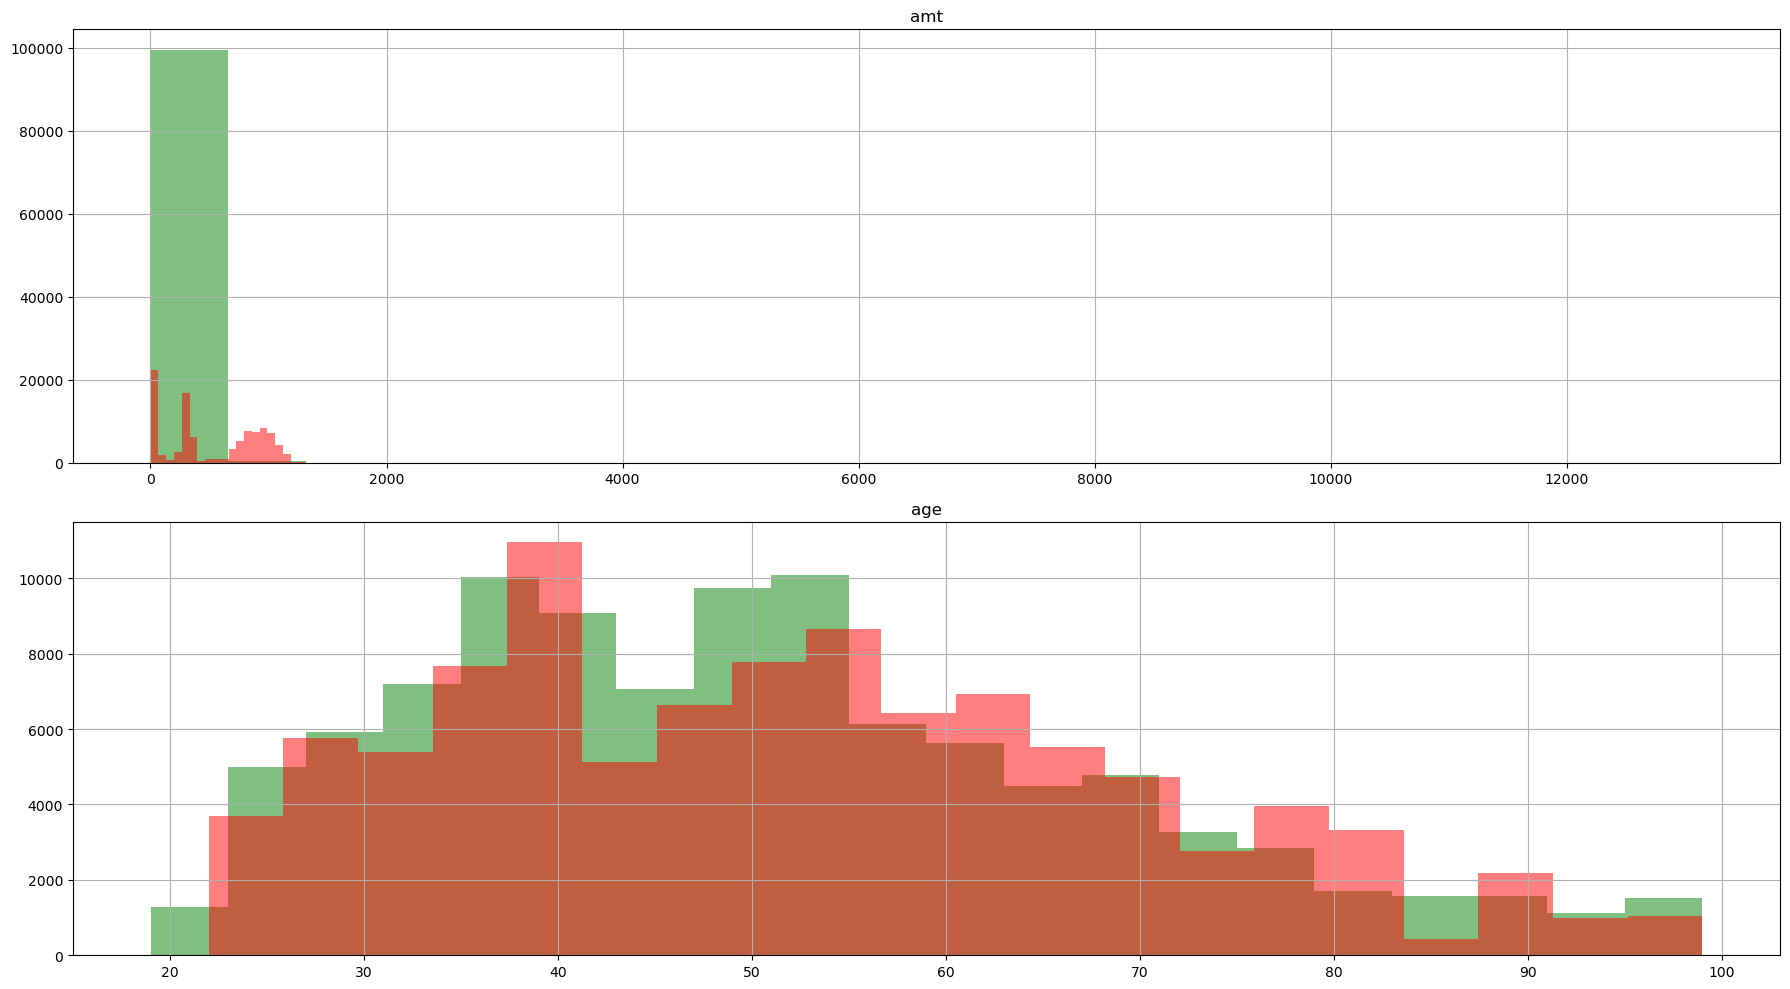

In [19]:
# List of numerical features to plot
num_feats = ["amt","age"]

# Create a figure with multiple subplots (2 rows, 1 column) and set the figure size
fig, ax = plt.subplots(2, 1, figsize=(18,10))

# Flattens the 2x1 array of axes into a 1D array for easier indexing
ax = ax.flatten()

# Plots histogram for non-fraudulent transactions
new_dataset[new_dataset.is_fraud == 0][num_feats].hist(bins=20, color="green", alpha=0.5, ax=ax[:len(num_feats)])

# Plot histograms for fraudulent transactions
new_dataset[new_dataset.is_fraud == 1][num_feats].hist(bins=20, color="red", alpha=0.5, ax=ax[:len(num_feats)])

plt.tight_layout()
plt.show()

In [20]:
new_dataset["category"].unique() # Displays unique values in the 'category' column

array(['personal_care', 'health_fitness', 'misc_pos', 'travel',
       'kids_pets', 'shopping_pos', 'food_dining', 'home',
       'entertainment', 'shopping_net', 'misc_net', 'grocery_pos',
       'gas_transport', 'grocery_net'], dtype=object)

In [21]:
# Initializes LabelEncoder for the categorical columns,
#Fits the encoder to the unique values of the 'category' column and 
#Transforms the columns to numeric labels and store them in a new column

le1 = LabelEncoder()
cat_le1 = le1.fit(new_dataset["category"])
new_dataset["category_le"] = le1.transform(new_dataset["category"])

le2 = LabelEncoder()
gen_le2 = le2.fit(new_dataset["gender"])
new_dataset["gender_le"] = le2.transform(new_dataset["gender"])

le3 = LabelEncoder()
state_le3 = le3.fit(new_dataset["state"])
new_dataset["state_le"]= le3.transform(new_dataset["state"])

le4 = LabelEncoder()
city_le4 = le4.fit(new_dataset["city"])
new_dataset["city_le"] = le4.transform(new_dataset["city"])

le5 = LabelEncoder()
job_le5 = le5.fit(new_dataset["job"])
new_dataset["job_le"] = le5.transform(new_dataset["job"])

In [22]:
new_dataset

,category,amt,gender,city,state,lat,long,job,is_fraud,age,category_le,gender_le,state_le,city_le,job_le
0,personal_care,2.86,M,Columbia,SC,33.9659,-80.9355,Mechanical engineer,0.0,56.0,10,1,39,157,275
1,personal_care,29.84,F,Altonah,UT,40.3207,-110.4360,"Sales professional, IT",0.0,34.0,10,0,43,16,392
2,health_fitness,41.28,F,Bellmore,NY,40.6729,-73.5365,"Librarian, public",0.0,53.0,5,0,33,61,259
3,misc_pos,60.05,M,Titusville,FL,28.5697,-80.8191,Set designer,0.0,37.0,9,1,8,764,407
4,travel,3.19,M,Falmouth,MI,44.2529,-85.0170,Furniture designer,0.0,69.0,13,1,21,247,196
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
213509,shopping_net,1016.98,F,Birmingham,AL,33.4816,-86.8590,Operational investment banker,1.0,24.0,11,0,1,71,307
354058,grocery_pos,329.17,F,Bristol,PA,40.1159,-74.8536,"Administrator, charities/voluntary organisations",1.0,39.0,4,0,37,94,7
333532,grocery_pos,284.76,F,Jaffrey,NH,42.8178,-72.0275,"Surveyor, hydrographic",1.0,74.0,4,0,29,364,424
218647,grocery_pos,362.27,M,Lohrville,IA,42.2619,-94.5566,Administrator,1.0,70.0,4,1,11,429,5


In [23]:
filtered_data = new_dataset.drop(columns=["category","gender","city","state","job"],axis=1) # Drops specified columns from the 'new_dataset' DataFrame

## Data Splitting

In [24]:
# Defines the feature set X by dropping the 'is_fraud' column from the 'filtered_data' DataFrame
X = filtered_data.drop(columns = "is_fraud",axis=1)
# Defines the target variable y by selecting the 'is_fraud' column from the 'filtered_data' DataFrame
y = filtered_data["is_fraud"]

In [25]:
X.head()

,amt,lat,long,age,category_le,gender_le,state_le,city_le,job_le
0,2.86,33.9659,-80.9355,56.0,10,1,39,157,275
1,29.84,40.3207,-110.4360,34.0,10,0,43,16,392
2,41.28,40.6729,-73.5365,53.0,5,0,33,61,259
3,60.05,28.5697,-80.8191,37.0,9,1,8,764,407
4,3.19,44.2529,-85.0170,69.0,13,1,21,247,196


In [26]:
y.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: is_fraud, dtype: float64

In [27]:
# Splits the dataset into training and testing sets
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=1,test_size=0.2)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(160000, 9) (40000, 9) (160000,) (40000,)


## Model Training

In [28]:
# Initializes the RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=1)
# Trains the RandomForestClassifier using the training data
model.fit(X_train,y_train)
# Use the trained model to make predictions on the test data
y_pred =model.predict(X_test)

## Model Evaluation

In [29]:
predlist = list(zip(y_pred,y_test))
predlist.head()

[(0.0, 0.0),
 (1.0, 1.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (1.0, 1.0),
 (0.0, 0.0),
 (1.0, 1.0),
 (1.0, 1.0),
 (0.0, 0.0),
 (1.0, 1.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (1.0, 1.0),
 (1.0, 1.0),
 (1.0, 1.0),
 (1.0, 1.0),
 (1.0, 1.0),
 (1.0, 1.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (1.0, 1.0),
 (0.0, 0.0),
 (1.0, 1.0),
 (1.0, 1.0),
 (0.0, 0.0),
 (1.0, 1.0),
 (0.0, 0.0),
 (1.0, 1.0),
 (1.0, 1.0),
 (0.0, 0.0),
 (1.0, 1.0),
 (1.0, 1.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (1.0, 1.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (1.0, 1.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (1.0, 1.0),
 (1.0, 1.0),
 (1.0, 1.0),
 (0.0, 0.0),
 (1.0, 1.0),
 (1.0, 1.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (1.0, 1.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (1.0, 1.0),
 (1.0, 0.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (1.0, 1.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (1.0, 1.0),
 (1.0, 1.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (0.0, 0.0),
 (0.0, 0.0),

In [30]:
# Calculates precision, recall, F1 score, ROC AUC,and PR AUC
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
precision_vals, recall_vals, _ = precision_recall_curve(y_test, y_pred)
pr_auc = auc(recall_vals, precision_vals)
print("Accuracy score:",accuracy_score(y_test,y_pred))
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"ROC AUC: {roc_auc:.2f}")
print(f"PR AUC: {pr_auc:.2f}")

Accuracy score: 0.9982
Precision: 1.00
Recall: 1.00
F1 Score: 1.00
ROC AUC: 1.00
PR AUC: 1.00


In [31]:
conf_matrix =confusion_matrix(y_test,y_pred)
conf_matrix

array([[20140,    72],
       [    0, 19788]], dtype=int64)

## Metrics Visualizations

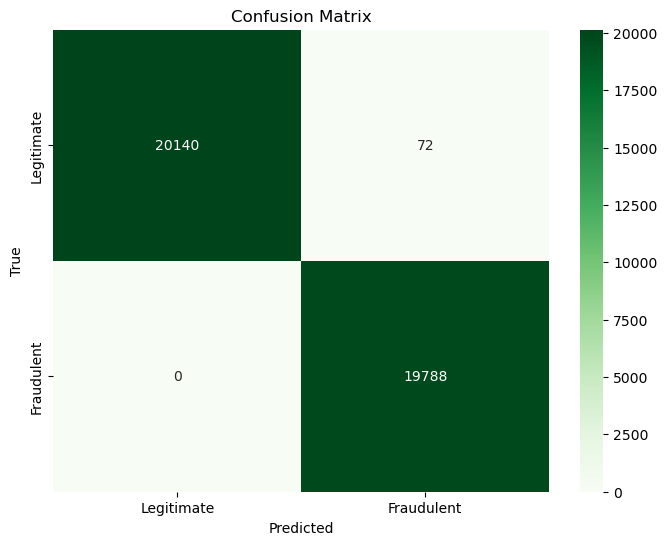

In [32]:
# Creates a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Greens", xticklabels=['Legitimate', 'Fraudulent'], yticklabels=['Legitimate', 'Fraudulent'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

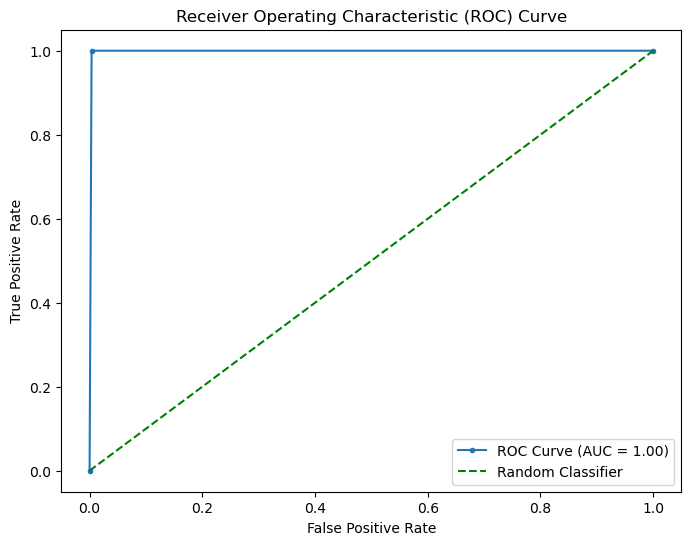

In [33]:
# Plots the ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, marker='.', label='ROC Curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], linestyle='--',color='green', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

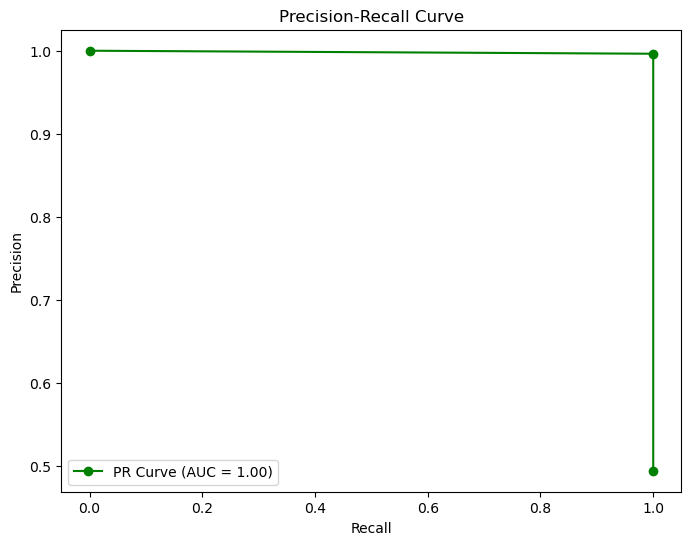

In [34]:
# Plots the Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall_vals, precision_vals, color='green', marker='o', label='PR Curve (AUC = %0.2f)' % pr_auc)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()